In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
data = pd.read_csv('HeartDisease.csv')

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [84]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [86]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [87]:
import pandas_profiling

In [88]:
profile = pandas_profiling.ProfileReport(data)
profile

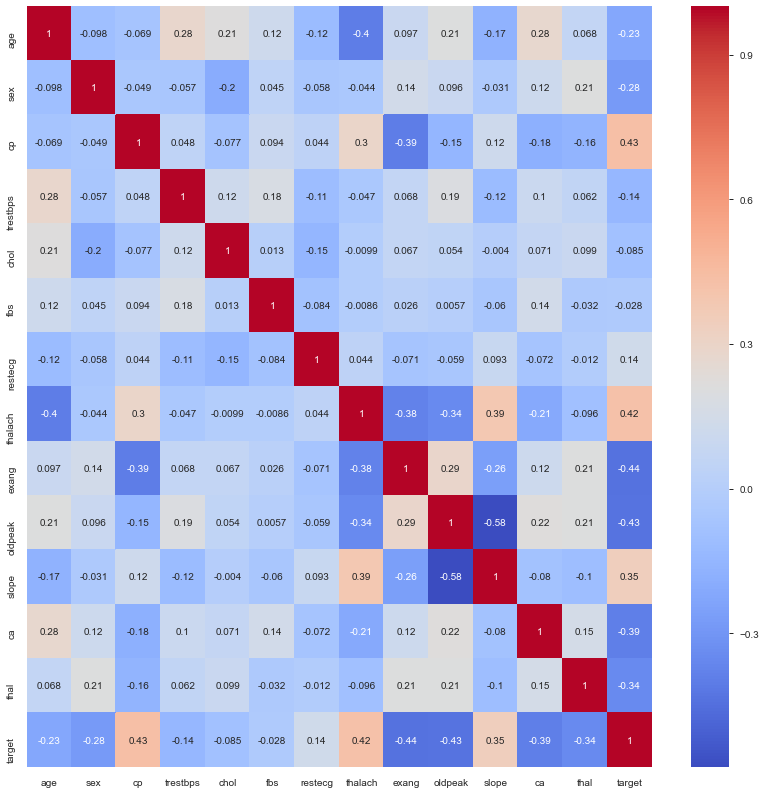

In [89]:
corr = data.corr()

plt.figure(figsize = (14,14))
sns.heatmap(corr, cbar =True, annot= True, cmap = 'coolwarm')

In [90]:
corr['target'].sort_values(ascending = False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

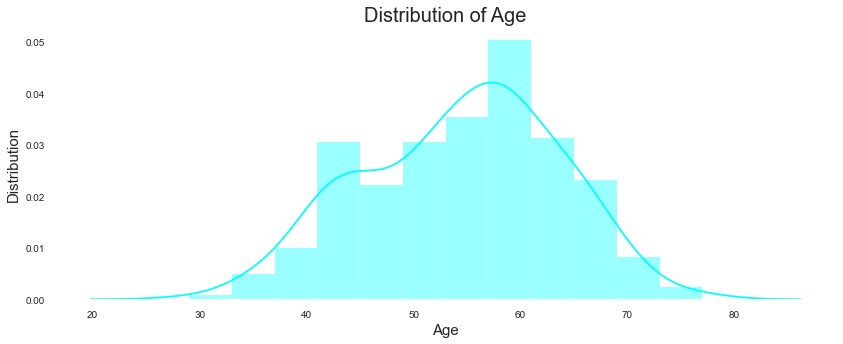

In [91]:
plt.figure(figsize = (14,5))

sns.distplot(data['age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Distribution', fontsize = 15)
plt.show()

In [92]:
sex_size

1    207
0     96
Name: sex, dtype: int64

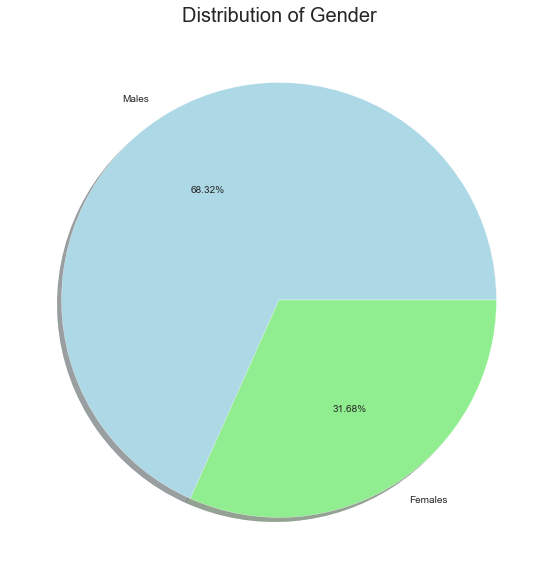

In [93]:
sex_size = data['sex'].value_counts()

plt.figure(figsize = (10,10))

plt.pie(sex_size, colors = ['lightblue','lightgreen'], 
        labels = ['Males','Females'] ,shadow = True, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)

plt.show()

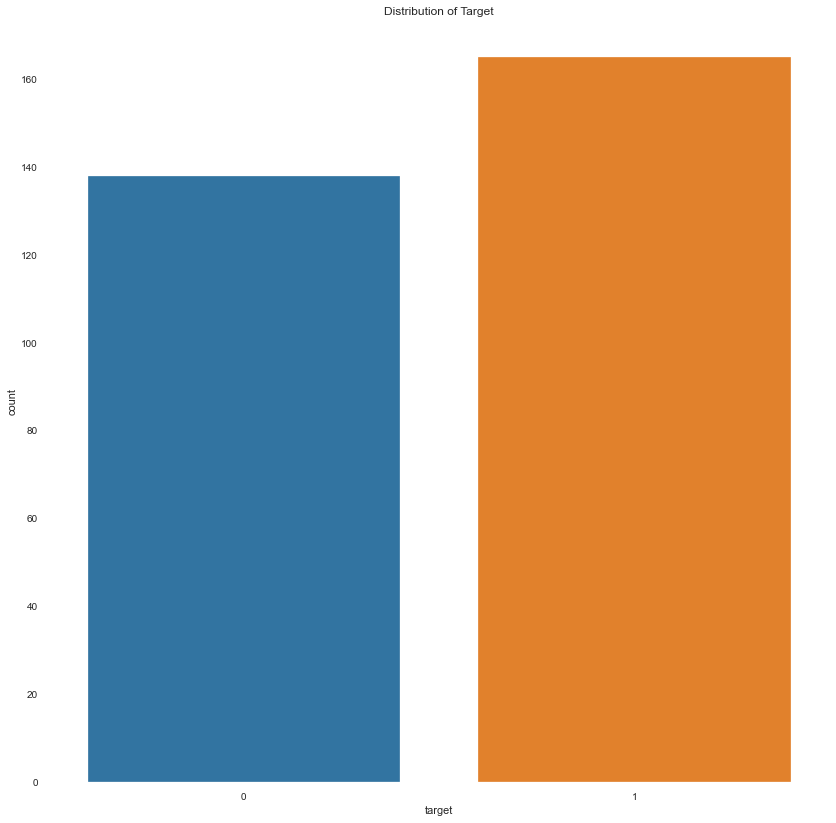

In [94]:
plt.figure(figsize = (14,14))

sns.countplot(data['target'])
plt.title('Distribution of Target')

plt.show()

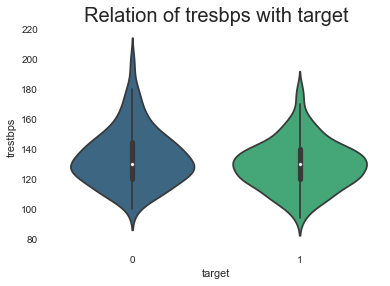

In [95]:
sns.violinplot(data['target'], data['trestbps'], palette = 'viridis')

plt.title('Relation of tresbps with target', fontsize = 20)
plt.show()

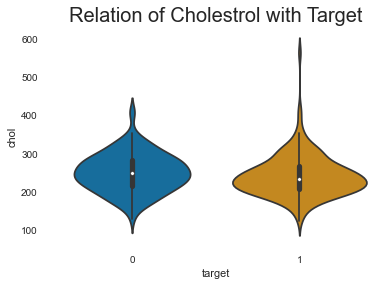

In [96]:
sns.violinplot(data['target'], data['chol'], palette = 'colorblind')
plt.title('Relation of Cholestrol with Target', fontsize = 20, fontweight = 30)
plt.show()

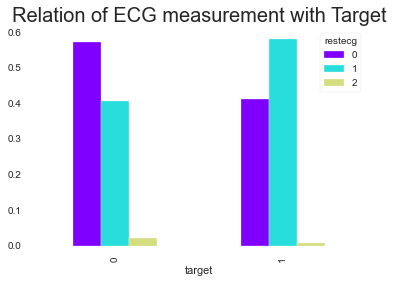

In [97]:
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

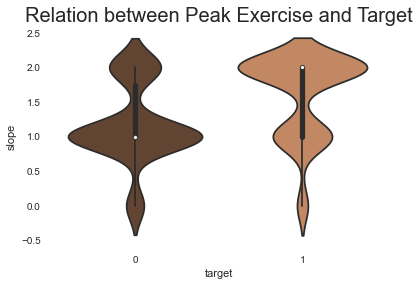

In [98]:
sns.violinplot(data['target'], data['slope'], palette = 'copper')
plt.title('Relation between Peak Exercise and Target', fontsize = 20)
plt.show()

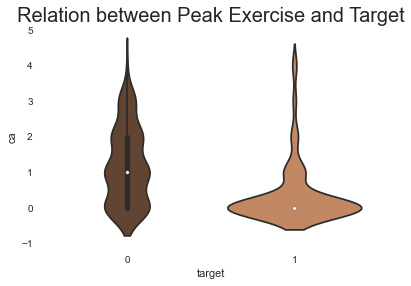

In [99]:
sns.violinplot(data['target'], data['ca'], palette = 'copper')
plt.title('Relation between Peak Exercise and Target', fontsize = 20)
plt.show()

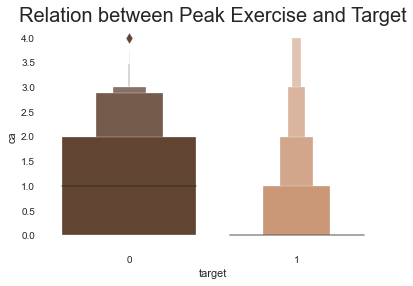

In [100]:
sns.boxenplot(data['target'], data['ca'], palette = 'copper')
plt.title('Relation between Peak Exercise and Target', fontsize = 20)
plt.show()

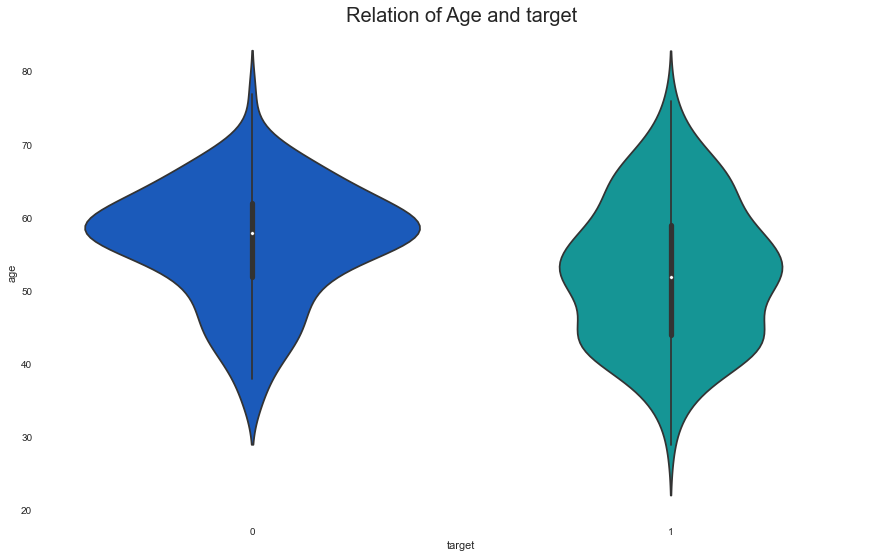

In [101]:
# relation between age and target

plt.rcParams['figure.figsize'] = (15, 9)
sns.violinplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

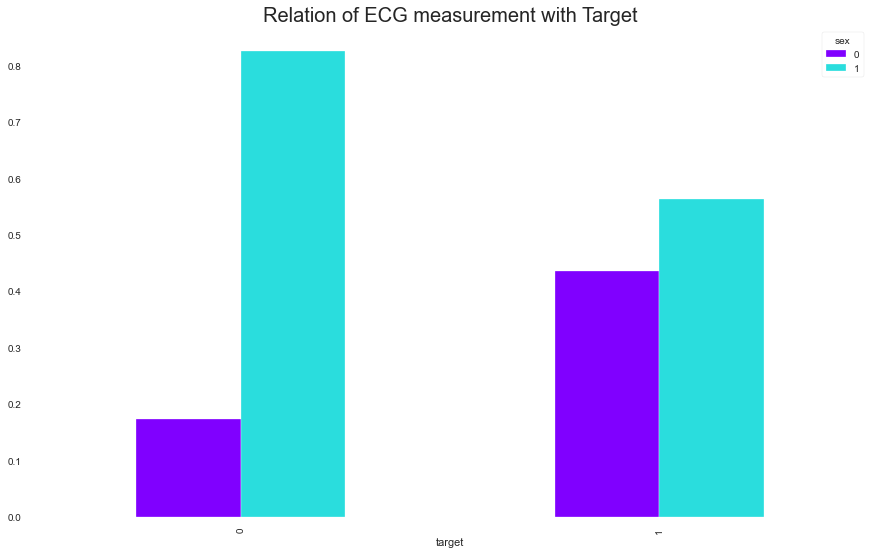

In [102]:
dat = pd.crosstab(data['target'], data['sex']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

In [103]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [104]:
data['sex'] = data['sex'].map({1: 'male', 0: 'female'})

data['chest_pain_type'] = data['chest_pain_type'].map({1 : 'typical angina', 2 : 'atypical angina', 3 : 'non-anginal pain', 4 : 'asymptomatic'})

data['fasting_blood_sugar'] = data['fasting_blood_sugar'].map({0: 'lower than 120mg/ml', 1 : 'greater than 120ml'})

data['rest_ecg'] = data['rest_ecg'].map({0: 'normal', 1: 'ST-T wave abnormality', 2 :'left ventricular hypertrophy'})

data['exercise_induced_angina'] = data['exercise_induced_angina'].map({0: 'no', 1: 'yes'})

data['st_slope'] = data['st_slope'].map({0 : 'upsloping', 1 : 'flat', 2 :'downsloping'})

data['thalassemia'] = data['thalassemia'].map({1 : 'normal', 2: 'fixed defect', 3: 'reversable defect'})

In [105]:
data['sex'] = data['sex'].astype('object')

data['chest_pain_type'] = data['chest_pain_type'].astype('object')

data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')

data['rest_ecg'] = data['rest_ecg'].astype('object')

data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')

data['st_slope'] = data['st_slope'].astype('object')

data['thalassemia'] = data['thalassemia'].astype('object')

In [107]:
y = data['target']

data = data.drop('target', axis = 1)

print("Shape of y:", y.shape)

Shape of y: (303,)


In [116]:
data['chest_pain_type'].value_counts()

atypical angina     87
typical angina      50
non-anginal pain    23
Name: chest_pain_type, dtype: int64

In [127]:
x = pd.get_dummies(data)

In [128]:
x.shape

(303, 24)

In [129]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (303, 24)
Shape of y: (303,)


In [130]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (242, 24)
Shape of x_test : (61, 24)
Shape of y_train : (242,)
Shape of y_test : (61,)


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [132]:
model = RandomForestClassifier(n_estimators= 50, max_depth= 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

In [133]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9214876033057852
Testing Accuracy : 0.8524590163934426


              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



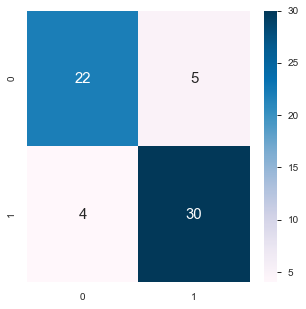

In [134]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [143]:
featimp = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
print(featimp)

num_major_vessels                          0.133383
max_heart_rate_achieved                    0.112718
thalassemia_fixed defect                   0.100320
st_depression                              0.090649
thalassemia_reversable defect              0.086422
age                                        0.064947
exercise_induced_angina_yes                0.064784
chest_pain_type_atypical angina            0.045862
cholesterol                                0.041872
exercise_induced_angina_no                 0.038371
st_slope_downsloping                       0.038308
resting_blood_pressure                     0.035364
sex_female                                 0.029852
st_slope_flat                              0.026386
sex_male                                   0.026020
chest_pain_type_non-anginal pain           0.013630
rest_ecg_ST-T wave abnormality             0.009994
chest_pain_type_typical angina             0.008308
fasting_blood_sugar_greater than 120ml     0.008199
fasting_bloo

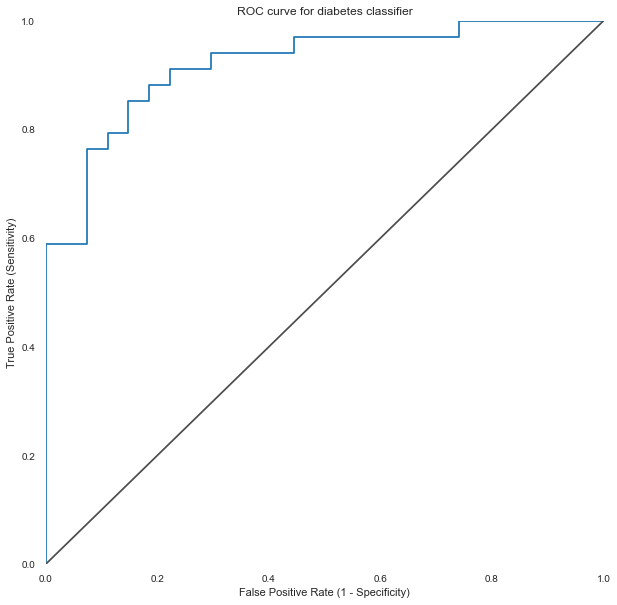

In [152]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [154]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, y_pred_quant)
score

0.9193899782135075